In [21]:
import pandas as pd
import csv
import os
from statistics import mean
from textblob import TextBlob
import numpy as np

# Öznitelikler ve Veri Tablosu

Duygu analizi labelları 1'den 5 e kadar Nötr, Korku, Şaşkınlık, Kızgınlık, Üzüntü ve Mutluluk kategorilerini ifade eder. 

In [22]:
df_dataset = pd.read_csv("../dataset/dataset.csv")

In [29]:
df_rap=df_dataset.loc[df_dataset["sarki_turu"]=='rap']

sarki_adi=[]
lengths=[]
word_lengths=[]
repeated_word=[]
emtion_analysis=[] 
rap_sarki_sozleri=[]
for index,row in df_rap.iterrows():
    sarki_adi.append(row['baslik'])
    rap_sarki_sozleri.append(row['sarki_sozu'])
    #row="".join(row)
   
    lyrics = row["sarki_sozu"]
    lengths.append(len(lyrics.split(" ")))
    temp=[]
    for word in lyrics.split(" "):
        temp.append(len(word))

    turkish_text = row["sarki_sozu"]
    blob = TextBlob(turkish_text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        if polarity >= 0.5:
           # print("Mutlu")
            emtion_analysis.append(5)
        else:
            #print("Şaşırmış")
            emtion_analysis.append(2)
    elif polarity < 0:
        if polarity <= -0.5:
            #print("Kızgın")
            emtion_analysis.append(3)
        else:
            #print("Üzgün")
            emtion_analysis.append(4)
    else:
        
        if "korku" in turkish_text.lower() or "korkmak" in turkish_text.lower():
            if polarity <= -0.3:
                #print("Korkmuş")
                emtion_analysis.append(1)
            else:
                #print("Nötr")
                emtion_analysis.append(0)
        else:
            #print("Nötr")
            emtion_analysis.append(0)
    word_lengths.append(mean(temp))

    counts = {}
    str_row=lyrics.split(("\n"))
    temp_List2=[]
    for sentence in str_row:
        for word in sentence.split(" "):
            #print(word)
            #print()

            if word not in counts:
                counts[word] = 0
            counts[word] += 1
    for item in counts.values():
        temp_List2.append(item)
        #print(item)
        #print()
    #sorted_c=sorted(counts)
    repeated_word.append(sum(temp_List2)/len(temp_List2))

rap_plot_data=[mean(lengths),mean(word_lengths),mean(repeated_word)]
data = {'Şarki Adı':sarki_adi,
        'Toplam Kelime Sayısı': lengths,
        'Ortalama Kelime Uzunlukları': word_lengths,
        'Ortalama Kelime Tekrarı ':repeated_word,
        'Duygu Analizi':emtion_analysis}

rap_df = pd.DataFrame(data)
rap_df["eski_turkce_kelime_orani"] = df_rap["eski_turkce_kelime_orani"].values
rap_df["fiil_orani"] = df_rap["fiil_orani"].values
rap_df["sifat_orani"] = df_rap["sifat_orani"].values
rap_df["zarf_orani"] = df_rap["zarf_orani"].values
rap_df["baglac_orani"] = df_rap["baglac_orani"].values
rap_df["unlem_orani"] = df_rap["unlem_orani"].values
rap_df["soru_orani"] = df_rap["soru_orani"].values
rap_df["bilinmeyen_orani"] = df_rap["bilinmeyen_orani"].values
rap_df['Label']=0

In [31]:
df_pop=df_dataset.loc[df_dataset["sarki_turu"]=='pop']

sarki_adi=[]
lengths=[]
word_lengths=[]
repeated_word=[]
emtion_analysis=[] 
pop_sarki_sozleri=[]
for index,row in df_pop.iterrows():
    sarki_adi.append(row['baslik'])
    pop_sarki_sozleri.append(row['sarki_sozu'])
    #row="".join(row)
   
    lyrics = row["sarki_sozu"]
    lengths.append(len(lyrics.split(" ")))
    temp=[]
    for word in lyrics.split(" "):
        temp.append(len(word))

    turkish_text = row["sarki_sozu"]
    blob = TextBlob(turkish_text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        if polarity >= 0.5:
           # print("Mutlu")
            emtion_analysis.append(5)
        else:
            #print("Şaşırmış")
            emtion_analysis.append(2)
    elif polarity < 0:
        if polarity <= -0.5:
            #print("Kızgın")
            emtion_analysis.append(3)
        else:
            #print("Üzgün")
            emtion_analysis.append(4)
    else:
        
        if "korku" in turkish_text.lower() or "korkmak" in turkish_text.lower():
            if polarity <= -0.3:
                #print("Korkmuş")
                emtion_analysis.append(1)
            else:
                #print("Nötr")
                emtion_analysis.append(0)
        else:
            #print("Nötr")
            emtion_analysis.append(0)
    word_lengths.append(mean(temp))

    counts = {}
    str_row=lyrics.split(("\n"))
    temp_List2=[]
    for sentence in str_row:
        for word in sentence.split(" "):
            #print(word)
            #print()

            if word not in counts:
                counts[word] = 0
            counts[word] += 1
    for item in counts.values():
        temp_List2.append(item)
        #print(item)
        #print()
    #sorted_c=sorted(counts)
    repeated_word.append(sum(temp_List2)/len(temp_List2))

pop_plot_data=[mean(lengths),mean(word_lengths),mean(repeated_word)]
data = {'Şarki Adı':sarki_adi,
        'Toplam Kelime Sayısı': lengths,
        'Ortalama Kelime Uzunlukları': word_lengths,
        'Ortalama Kelime Tekrarı ':repeated_word,
        'Duygu Analizi':emtion_analysis}
pop_df = pd.DataFrame(data)
pop_df["eski_turkce_kelime_orani"] = df_pop["eski_turkce_kelime_orani"].values
pop_df["fiil_orani"] = df_pop["fiil_orani"].values
pop_df["sifat_orani"] = df_pop["sifat_orani"].values
pop_df["zarf_orani"] = df_pop["zarf_orani"].values
pop_df["baglac_orani"] = df_pop["baglac_orani"].values
pop_df["unlem_orani"] = df_pop["unlem_orani"].values
pop_df["soru_orani"] = df_pop["soru_orani"].values
pop_df["bilinmeyen_orani"] = df_pop["bilinmeyen_orani"].values
pop_df['Label']=1


In [25]:
df_rock=df_dataset.loc[df_dataset["sarki_turu"]=='rock']

sarki_adi=[]
lengths=[]
word_lengths=[]
repeated_word=[]
emtion_analysis=[] 
rock_sarki_sozleri=[]
for index,row in df_rock.iterrows():
    sarki_adi.append(row['baslik'])
    rock_sarki_sozleri.append(row['sarki_sozu'])
    #row="".join(row)
   
    lyrics = row["sarki_sozu"]
    lengths.append(len(lyrics.split(" ")))
    temp=[]
    for word in lyrics.split(" "):
        temp.append(len(word))

    turkish_text = row["sarki_sozu"]
    blob = TextBlob(turkish_text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        if polarity >= 0.5:
           # print("Mutlu")
            emtion_analysis.append(5)
        else:
            #print("Şaşırmış")
            emtion_analysis.append(2)
    elif polarity < 0:
        if polarity <= -0.5:
            #print("Kızgın")
            emtion_analysis.append(3)
        else:
            #print("Üzgün")
            emtion_analysis.append(4)
    else:
        
        if "korku" in turkish_text.lower() or "korkmak" in turkish_text.lower():
            if polarity <= -0.3:
                #print("Korkmuş")
                emtion_analysis.append(1)
            else:
                #print("Nötr")
                emtion_analysis.append(0)
        else:
            #print("Nötr")
            emtion_analysis.append(0)
    word_lengths.append(mean(temp))

    counts = {}
    str_row=lyrics.split(("\n"))
    temp_List2=[]
    for sentence in str_row:
        for word in sentence.split(" "):
            #print(word)
            #print()

            if word not in counts:
                counts[word] = 0
            counts[word] += 1
    for item in counts.values():
        temp_List2.append(item)
        #print(item)
        #print()
    #sorted_c=sorted(counts)
    repeated_word.append(sum(temp_List2)/len(temp_List2))

rock_plot_data=[mean(lengths),mean(word_lengths),mean(repeated_word)]
data = {'Şarki Adı':sarki_adi,
        'Toplam Kelime Sayısı': lengths,
        'Ortalama Kelime Uzunlukları': word_lengths,
        'Ortalama Kelime Tekrarı ':repeated_word,
        'Duygu Analizi':emtion_analysis}
rock_df = pd.DataFrame(data)
rock_df["eski_turkce_kelime_orani"] = df_pop["eski_turkce_kelime_orani"].values
rock_df["fiil_orani"] = df_rock["fiil_orani"].values
rock_df["sifat_orani"] = df_rock["sifat_orani"].values
rock_df["zarf_orani"] = df_rock["zarf_orani"].values
rock_df["baglac_orani"] = df_rock["baglac_orani"].values
rock_df["unlem_orani"] = df_rock["unlem_orani"].values
rock_df["soru_orani"] = df_rock["soru_orani"].values
rock_df["bilinmeyen_orani"] = df_rock["bilinmeyen_orani"].values
rock_df['Label']=2

In [26]:
df_ilahi=df_dataset.loc[df_dataset["sarki_turu"]=='ilahi']

sarki_adi=[]
lengths=[]
word_lengths=[]
repeated_word=[]
emtion_analysis=[] 
ilahi_sarki_sozleri=[]
for index,row in df_ilahi.iterrows():
    sarki_adi.append(row['baslik'])
    ilahi_sarki_sozleri.append(row['sarki_sozu'])
    #row="".join(row)
   
    lyrics = row["sarki_sozu"]
    lengths.append(len(lyrics.split(" ")))
    temp=[]
    for word in lyrics.split(" "):
        temp.append(len(word))

    turkish_text = row["sarki_sozu"]
    blob = TextBlob(turkish_text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        if polarity >= 0.5:
           # print("Mutlu")
            emtion_analysis.append(5)
        else:
            #print("Şaşırmış")
            emtion_analysis.append(2)
    elif polarity < 0:
        if polarity <= -0.5:
            #print("Kızgın")
            emtion_analysis.append(3)
        else:
            #print("Üzgün")
            emtion_analysis.append(4)
    else:
        
        if "korku" in turkish_text.lower() or "korkmak" in turkish_text.lower():
            if polarity <= -0.3:
                #print("Korkmuş")
                emtion_analysis.append(1)
            else:
                #print("Nötr")
                emtion_analysis.append(0)
        else:
            #print("Nötr")
            emtion_analysis.append(0)
    word_lengths.append(mean(temp))

    counts = {}
    str_row=lyrics.split(("\n"))
    temp_List2=[]
    for sentence in str_row:
        for word in sentence.split(" "):
            #print(word)
            #print()

            if word not in counts:
                counts[word] = 0
            counts[word] += 1
    for item in counts.values():
        temp_List2.append(item)
        #print(item)
        #print()
    #sorted_c=sorted(counts)
    repeated_word.append(sum(temp_List2)/len(temp_List2))

ilahi_plot_data=[mean(lengths),mean(word_lengths),mean(repeated_word)]
data = {'Şarki Adı':sarki_adi,
        'Toplam Kelime Sayısı': lengths,
        'Ortalama Kelime Uzunlukları': word_lengths,
        'Ortalama Kelime Tekrarı ':repeated_word,
        'Duygu Analizi':emtion_analysis}
ilahi_df = pd.DataFrame(data)
ilahi_df["eski_turkce_kelime_orani"] = df_pop["eski_turkce_kelime_orani"].values
ilahi_df["fiil_orani"] = df_ilahi["fiil_orani"].values
ilahi_df["sifat_orani"] = df_ilahi["sifat_orani"].values
ilahi_df["zarf_orani"] = df_ilahi["zarf_orani"].values
ilahi_df["baglac_orani"] = df_ilahi["baglac_orani"].values
ilahi_df["unlem_orani"] = df_ilahi["unlem_orani"].values
ilahi_df["soru_orani"] = df_ilahi["soru_orani"].values
ilahi_df["bilinmeyen_orani"] = df_ilahi["bilinmeyen_orani"].values
ilahi_df['Label']=3

In [27]:
df_sanat=df_dataset.loc[df_dataset["sarki_turu"]=='sanat']

sarki_adi=[]
lengths=[]
word_lengths=[]
repeated_word=[]
emtion_analysis=[] 
sanat_sarki_sozleri=[]
for index,row in df_sanat.iterrows():
    sarki_adi.append(row['baslik'])
    sanat_sarki_sozleri.append(row['sarki_sozu'])
    #row="".join(row)
   
    lyrics = row["sarki_sozu"]
    lengths.append(len(lyrics.split(" ")))
    temp=[]
    for word in lyrics.split(" "):
        temp.append(len(word))

    turkish_text = row["sarki_sozu"]
    blob = TextBlob(turkish_text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        if polarity >= 0.5:
           # print("Mutlu")
            emtion_analysis.append(5)
        else:
            #print("Şaşırmış")
            emtion_analysis.append(2)
    elif polarity < 0:
        if polarity <= -0.5:
            #print("Kızgın")
            emtion_analysis.append(3)
        else:
            #print("Üzgün")
            emtion_analysis.append(4)
    else:
        
        if "korku" in turkish_text.lower() or "korkmak" in turkish_text.lower():
            if polarity <= -0.3:
                #print("Korkmuş")
                emtion_analysis.append(1)
            else:
                #print("Nötr")
                emtion_analysis.append(0)
        else:
            #print("Nötr")
            emtion_analysis.append(0)
    word_lengths.append(mean(temp))

    counts = {}
    str_row=lyrics.split(("\n"))
    temp_List2=[]
    for sentence in str_row:
        for word in sentence.split(" "):
            #print(word)
            #print()

            if word not in counts:
                counts[word] = 0
            counts[word] += 1
    for item in counts.values():
        temp_List2.append(item)
        #print(item)
        #print()
    #sorted_c=sorted(counts)
    repeated_word.append(sum(temp_List2)/len(temp_List2))

sanat_plot_data=[mean(lengths),mean(word_lengths),mean(repeated_word)]
data = {'Şarki Adı':sarki_adi,
        'Toplam Kelime Sayısı': lengths,
        'Ortalama Kelime Uzunlukları': word_lengths,
        'Ortalama Kelime Tekrarı ':repeated_word,
        'Duygu Analizi':emtion_analysis}
sanat_df = pd.DataFrame(data)
sanat_df["eski_turkce_kelime_orani"] = df_pop["eski_turkce_kelime_orani"].values
sanat_df["fiil_orani"] = df_sanat["fiil_orani"].values
sanat_df["sifat_orani"] = df_sanat["sifat_orani"].values
sanat_df["zarf_orani"] = df_sanat["zarf_orani"].values
sanat_df["baglac_orani"] = df_sanat["baglac_orani"].values
sanat_df["unlem_orani"] = df_sanat["unlem_orani"].values
sanat_df["soru_orani"] = df_sanat["soru_orani"].values
sanat_df["bilinmeyen_orani"] = df_sanat["bilinmeyen_orani"].values
sanat_df['Label']=4

In [28]:
df_halk=df_dataset.loc[df_dataset["sarki_turu"]=='halk']

sarki_adi=[]
lengths=[]
word_lengths=[]
repeated_word=[]
emtion_analysis=[] 
halk_sarki_sozleri=[]
for index,row in df_halk.iterrows():
    sarki_adi.append(row['baslik'])
    halk_sarki_sozleri.append(row['sarki_sozu'])
    #row="".join(row)
   
    lyrics = row["sarki_sozu"]
    lengths.append(len(lyrics.split(" ")))
    temp=[]
    for word in lyrics.split(" "):
        temp.append(len(word))

    turkish_text = row["sarki_sozu"]
    blob = TextBlob(turkish_text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        if polarity >= 0.5:
           # print("Mutlu")
            emtion_analysis.append(5)
        else:
            #print("Şaşırmış")
            emtion_analysis.append(2)
    elif polarity < 0:
        if polarity <= -0.5:
            #print("Kızgın")
            emtion_analysis.append(3)
        else:
            #print("Üzgün")
            emtion_analysis.append(4)
    else:
        
        if "korku" in turkish_text.lower() or "korkmak" in turkish_text.lower():
            if polarity <= -0.3:
                #print("Korkmuş")
                emtion_analysis.append(1)
            else:
                #print("Nötr")
                emtion_analysis.append(0)
        else:
            #print("Nötr")
            emtion_analysis.append(0)
    word_lengths.append(mean(temp))

    counts = {}
    str_row=lyrics.split(("\n"))
    temp_List2=[]
    for sentence in str_row:
        for word in sentence.split(" "):
            #print(word)
            #print()

            if word not in counts:
                counts[word] = 0
            counts[word] += 1
    for item in counts.values():
        temp_List2.append(item)
        #print(item)
        #print()
    #sorted_c=sorted(counts)
    repeated_word.append(sum(temp_List2)/len(temp_List2))

halk_plot_data=[mean(lengths),mean(word_lengths),mean(repeated_word)]
data = {'Şarki Adı':sarki_adi,
        'Toplam Kelime Sayısı': lengths,
        'Ortalama Kelime Uzunlukları': word_lengths,
        'Ortalama Kelime Tekrarı ':repeated_word,
        'Duygu Analizi':emtion_analysis}
halk_df = pd.DataFrame(data)
halk_df["eski_turkce_kelime_orani"] = df_pop["eski_turkce_kelime_orani"].values
halk_df["fiil_orani"] = df_halk["fiil_orani"].values
halk_df["sifat_orani"] = df_halk["sifat_orani"].values
halk_df["zarf_orani"] = df_halk["zarf_orani"].values
halk_df["baglac_orani"] = df_halk["baglac_orani"].values
halk_df["unlem_orani"] = df_halk["unlem_orani"].values
halk_df["soru_orani"] = df_halk["soru_orani"].values
halk_df["bilinmeyen_orani"] = df_halk["bilinmeyen_orani"].values
halk_df['Label']=5

In [32]:
rap_df

,Şarki Adı,Toplam Kelime Sayısı,Ortalama Kelime Uzunlukları,Ortalama Kelime Tekrarı,Duygu Analizi,eski_turkce_kelime_orani,fiil_orani,sifat_orani,zarf_orani,baglac_orani,unlem_orani,soru_orani,bilinmeyen_orani,Label
0,Sagopa Kajmer - Istakoz,346,6.624277,1.572491,0,0.07,0.17,0.09,0.05,0.05,0.01,0.00,0.03,0
1,Ezhel - Felaket,120,8.166667,1.387931,0,0.12,0.19,0.06,0.08,0.02,0.00,0.00,0.03,0
2,Sansar Salvo - Bela,125,7.400000,1.424779,3,0.06,0.25,0.08,0.04,0.03,0.00,0.01,0.06,0
3,Norm Ender - Mekanın Sahibi,241,7.012448,1.464115,2,0.01,0.16,0.08,0.04,0.02,0.07,0.00,0.11,0
4,Ben Fero - Mahallemiz Esmer,266,6.796992,1.429864,2,0.06,0.13,0.07,0.04,0.01,0.01,0.01,0.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ez - BENIM HAYALLER,248,6.217742,1.589474,2,0.07,0.10,0.05,0.05,0.03,0.00,0.01,0.27,0
196,Canbay & Wolker - Fersah,239,7.380753,1.661111,0,0.02,0.12,0.06,0.03,0.01,0.02,0.00,0.07,0
197,grogi - balerin,310,6.587097,1.928205,0,0.02,0.16,0.10,0.04,0.02,0.01,0.00,0.15,0
198,sansar salvo ağır roman,240,7.158333,1.500000,0,0.07,0.15,0.14,0.03,0.05,0.00,0.00,0.05,0


In [33]:
pop_df

,Şarki Adı,Toplam Kelime Sayısı,Ortalama Kelime Uzunlukları,Ortalama Kelime Tekrarı,Duygu Analizi,eski_turkce_kelime_orani,fiil_orani,sifat_orani,zarf_orani,baglac_orani,unlem_orani,soru_orani,bilinmeyen_orani,Label
0,İbrahim Keleş – Ah Be Kader,49,7.795918,1.218182,0,0.16,0.12,0.09,0.12,0.00,0.05,0.00,0.02,1
1,Bora Öztoprak – Meselâ,45,6.533333,1.239130,2,0.12,0.25,0.08,0.08,0.08,0.00,0.03,0.02,1
2,Mustafa Ceceli – Ki Sen,46,8.086957,1.148148,0,0.06,0.29,0.02,0.02,0.10,0.00,0.05,0.03,1
3,İdo Tatlıses – Buluşacaktık,62,9.064516,1.318182,0,0.07,0.29,0.05,0.08,0.09,0.00,0.03,0.03,1
4,Pelin Gedik – İki Şaşkın,83,7.542169,1.493151,0,0.06,0.26,0.07,0.09,0.03,0.00,0.01,0.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Tuğba Özerk – Aşk Defteri,39,9.564103,1.142857,0,0.11,0.29,0.11,0.02,0.00,0.00,0.00,0.04,1
196,Fatma Turgut – Palavra,61,7.672131,1.250000,0,0.06,0.15,0.15,0.16,0.00,0.00,0.04,0.00,1
197,Mustafa Ceceli – Düşünme Hiç,47,8.957447,1.076923,0,0.10,0.22,0.10,0.14,0.04,0.00,0.00,0.00,1
198,Cemil Demirbakan – Yazgı,52,7.673077,1.743590,0,0.01,0.31,0.01,0.04,0.00,0.00,0.09,0.00,1


In [34]:
rock_df

,Şarki Adı,Toplam Kelime Sayısı,Ortalama Kelime Uzunlukları,Ortalama Kelime Tekrarı,Duygu Analizi,eski_turkce_kelime_orani,fiil_orani,sifat_orani,zarf_orani,baglac_orani,unlem_orani,soru_orani,bilinmeyen_orani,Label
0,Duman - senden daha güzel,63,9.476190,3.840000,0,0.16,0.16,0.21,0.18,0.03,0.00,0.00,0.00,2
1,Mor ve Ötesi - Cambaz,105,7.085714,2.816327,0,0.12,0.24,0.11,0.01,0.00,0.00,0.03,0.05,2
2,Athena - Yapma Be Kanka,69,6.913043,1.400000,2,0.06,0.27,0.08,0.04,0.02,0.02,0.02,0.01,2
3,Pinhani - Beni Sen İnandır,105,9.314286,2.323529,0,0.07,0.20,0.13,0.14,0.03,0.00,0.00,0.03,2
4,Manga - Bir Kadın Çizeceksin,213,8.206573,1.725490,0,0.06,0.26,0.05,0.11,0.04,0.02,0.01,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Pinhani - Sana Bir Şey Olursa,98,7.153061,1.921875,0,0.11,0.26,0.12,0.04,0.01,0.02,0.00,0.00,2
196,Kurban - Sahip,58,5.862069,1.277778,0,0.06,0.21,0.10,0.07,0.04,0.00,0.01,0.01,2
197,Şebnem Ferah - Yalnız,90,9.366667,1.954545,0,0.10,0.15,0.20,0.02,0.02,0.00,0.00,0.01,2
198,Küçük bir ihtimal,54,9.425926,1.974359,0,0.01,0.18,0.14,0.04,0.00,0.00,0.03,0.00,2


In [42]:
ilahi_df

,Şarki Adı,Toplam Kelime Sayısı,Ortalama Kelime Uzunlukları,Ortalama Kelime Tekrarı,Duygu Analizi,eski_turkce_kelime_orani,fiil_orani,sifat_orani,zarf_orani,baglac_orani,unlem_orani,soru_orani,bilinmeyen_orani,Label
0,Nice bir uyursun uyanmaz mısın,60,7.983333,1.381818,5,0.16,0.33,0.05,0.04,0.00,0.00,0.03,0.01,3
1,A Sultanım sen var iken,26,6.500000,1.478261,0,0.12,0.09,0.21,0.03,0.09,0.03,0.00,0.06,3
2,Âteş-i aşkınla yandır kalbimi subh ü mesâ,44,6.704545,1.155556,0,0.06,0.18,0.02,0.00,0.02,0.04,0.00,0.22,3
3,Bu akl-ü fikr ile Mevla bulunmaz,116,6.155172,2.745098,0,0.07,0.13,0.02,0.00,0.19,0.00,0.00,0.02,3
4,Buyruğun tut Rahmanın,33,6.484848,1.344828,0,0.06,0.29,0.05,0.03,0.00,0.00,0.00,0.08,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Benim Adım Dertli Dolap,39,8.487179,1.260870,0,0.11,0.15,0.09,0.02,0.00,0.00,0.00,0.09,3
196,Yar Senin Köyüne Yolu Varmazsa,44,7.750000,1.600000,0,0.06,0.24,0.02,0.11,0.00,0.00,0.00,0.00,3
197,Bize Nasip Eyle Ya Rab,43,5.488372,3.055556,0,0.10,0.11,0.00,0.04,0.19,0.00,0.00,0.00,3
198,Bırakma Sen Bizi Ya Resulullah,54,6.981481,2.680000,0,0.01,0.05,0.08,0.00,0.15,0.00,0.00,0.11,3


In [36]:
sanat_df

,Şarki Adı,Toplam Kelime Sayısı,Ortalama Kelime Uzunlukları,Ortalama Kelime Tekrarı,Duygu Analizi,eski_turkce_kelime_orani,fiil_orani,sifat_orani,zarf_orani,baglac_orani,unlem_orani,soru_orani,bilinmeyen_orani,Label
0,"Ahımı, Hicranımı Sakladım",19,7.263158,1.000000,0,0.16,0.27,0.05,0.09,0.05,0.0,0.00,0.00,4
1,Ah Bu Şarkıların Gözü Kör Olsun,72,6.444444,1.375000,5,0.12,0.16,0.17,0.06,0.03,0.0,0.02,0.00,4
2,Al Goncayı Deremedim,51,6.019608,1.666667,0,0.06,0.28,0.00,0.04,0.00,0.0,0.00,0.02,4
3,Arabaya Taş Koydum,33,7.333333,1.114286,0,0.07,0.24,0.11,0.00,0.03,0.0,0.00,0.18,4
4,Anar Ömrünce Gönül,24,7.583333,1.684211,0,0.06,0.06,0.06,0.00,0.00,0.0,0.00,0.03,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Yemin Ettim Bir Kere,22,6.500000,1.300000,0,0.11,0.28,0.00,0.08,0.00,0.0,0.00,0.00,4
196,Yıllardır Bekliyorum,35,8.342857,1.303030,0,0.06,0.24,0.10,0.05,0.00,0.0,0.02,0.07,4
197,Yıllar Ne Çabuk,23,6.086957,1.285714,0,0.10,0.15,0.12,0.08,0.00,0.0,0.00,0.00,4
198,Yıldızlı Semalardaki Haşmet,33,6.545455,1.344828,0,0.01,0.03,0.18,0.18,0.00,0.0,0.00,0.03,4


In [37]:
halk_df

,Şarki Adı,Toplam Kelime Sayısı,Ortalama Kelime Uzunlukları,Ortalama Kelime Tekrarı,Duygu Analizi,eski_turkce_kelime_orani,fiil_orani,sifat_orani,zarf_orani,baglac_orani,unlem_orani,soru_orani,bilinmeyen_orani,Label
0,Acem Kızı,36,6.250000,1.189189,0,0.16,0.07,0.05,0.09,0.02,0.00,0.05,0.00,5
1,Açma zülüflerin yellere karşı,39,6.051282,1.382353,0,0.12,0.15,0.00,0.00,0.00,0.00,0.07,0.02,5
2,Ah bir ataş ver cigaramı yakayım,41,6.731707,1.645161,0,0.06,0.28,0.08,0.00,0.00,0.00,0.00,0.02,5
3,Sana olan duyguları bir bilebilsen (Ah le yar ...,100,6.510000,2.066667,0,0.07,0.16,0.04,0.05,0.04,0.00,0.00,0.01,5
4,Ahu gözlerini sevdiğim dilber,41,9.000000,1.080000,0,0.06,0.25,0.13,0.02,0.00,0.00,0.02,0.04,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Zahidem,45,7.333333,1.036364,0,0.11,0.20,0.04,0.05,0.05,0.00,0.00,0.04,5
196,Zalim poyraz gıcım gıcım gıcılar,40,6.750000,1.142857,0,0.06,0.06,0.06,0.00,0.09,0.00,0.00,0.15,5
197,Zeynep bu güzellik var mı soyunda,71,8.140845,1.568966,0,0.10,0.11,0.10,0.02,0.00,0.00,0.01,0.02,5
198,Zeytinyağlı yiyemem aman,50,8.200000,2.161290,0,0.01,0.17,0.06,0.00,0.03,0.06,0.00,0.00,5


# Özniteliklerin Türlere Göre Karşılaştırılması

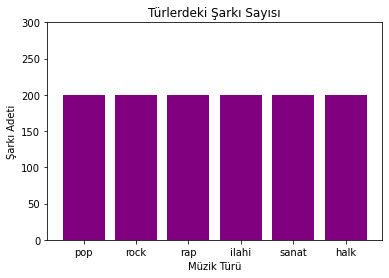

In [38]:
import matplotlib.pyplot as plt
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [200]*6

# Create the histogram
plt.bar(genres, values, color='purple')
plt.ylim(0, 300)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Şarkı Adeti')
plt.title('Türlerdeki Şarkı Sayısı')

# Show the plot
plt.show()

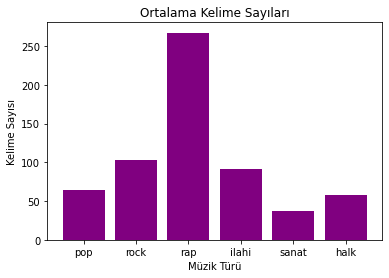

In [39]:
# Define the data
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop_plot_data[0],rock_plot_data[0],rap_plot_data[0],ilahi_plot_data[0],sanat_plot_data[0],halk_plot_data[0]]

# Create the histogram
plt.bar(genres, values, color='purple')
#plt.ylim(5, 10)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Kelime Sayısı')
plt.title('Ortalama Kelime Sayıları')

# Show the plot
plt.show()

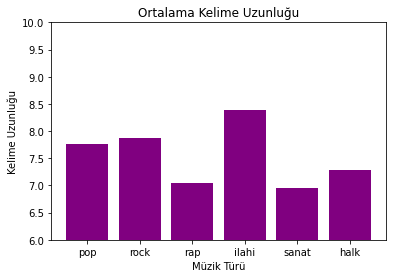

In [40]:
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop_plot_data[1],rock_plot_data[1],rap_plot_data[1],ilahi_plot_data[1],sanat_plot_data[1],halk_plot_data[1]]

# Create the histogram
plt.bar(genres, values, color='purple')
plt.ylim(6, 10)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Kelime Uzunluğu')
plt.title('Ortalama Kelime Uzunluğu')

# Show the plot
plt.show()

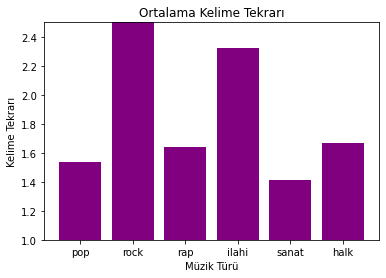

In [41]:
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop_plot_data[2],rock_plot_data[2],rap_plot_data[2],ilahi_plot_data[2],sanat_plot_data[2],halk_plot_data[2]]

# Create the histogram
plt.bar(genres, values, color='purple')
plt.ylim(1, 2.5)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Kelime Tekrarı')
plt.title('Ortalama Kelime Tekrarı')

# Show the plot
plt.show()